In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50 )
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white") 

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# genre

In [1277]:
everything = pd.read_csv('everything_scraped_new')

In [1278]:
everything.head(2)

,artist,track_name,artist_popularity,followers,artist_uri,genre,weekid,week_position,instance,weeks_on_chart,peak_position,track_popularity,track_uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration,key,mode,time_signature
0,Jane Child,Welcome to the Real World,36.0,4884.0,spotify:artist:5JBif5ahOKFFVuEpHhrp8Y,['new wave pop'],1990-06-02,90,1,1,90,19.0,spotify:track:37o0UBywazf2Xcy3297Que,0.00703,0.625,0.721,0.000001,0.317,-12.512,0.0325,104.651,0.851,299640,8,0,4
1,Jane Child,Welcome to the Real World,36.0,4884.0,spotify:artist:5JBif5ahOKFFVuEpHhrp8Y,['new wave pop'],1990-06-09,77,1,2,77,19.0,spotify:track:37o0UBywazf2Xcy3297Que,0.00703,0.625,0.721,0.000001,0.317,-12.512,0.0325,104.651,0.851,299640,8,0,4


## explore

lets remove all songs without a genre tag

In [422]:
print(everything.shape)
everything = everything[everything.genre != '[]']
print(everything.shape)

(236237, 26)
(227839, 26)


we can see that each artist has multiple genre tags

In [423]:
for x in everything.genre.unique()[:5]:
    print(x)

['new wave pop']
['dance pop', 'pop', 'pop rap', 'post-teen pop', 'urban contemporary']
['pop', 'pop rock']
['adult standards', 'disco', 'mellow gold', 'soft rock']
['dance pop', 'latin pop', 'new wave pop', 'soft rock']


## method 1

so lets count vectorise and manually look at columns with most 

In [424]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(strip_accents='unicode', ngram_range=(1, 1))
cvec_sparse = cvec.fit_transform(everything.genre)
df_cvec  = pd.DataFrame(cvec_sparse.todense(), columns=cvec.get_feature_names())

In [425]:
total = pd.DataFrame(df_cvec.sum(), columns=['counts']).T.T
total.sort_values('counts', ascending=False).head(20)

,counts
rock,303619
pop,256455
country,97503
rap,79766
hip,74553
soul,62874
hop,57893
dance,53860
classic,50577
mellow,48196


In [137]:
for x in everything_clean_genre.genre.unique():
    print(x)

['new wave pop']
['dance pop', 'pop', 'pop rap', 'post-teen pop', 'urban contemporary']
['pop', 'pop rock']
['adult standards', 'disco', 'mellow gold', 'soft rock']
['dance pop', 'latin pop', 'new wave pop', 'soft rock']
['adult standards', 'disco', 'mellow gold', 'motown', 'quiet storm', 'soft rock']
['dance pop', 'r&b', 'urban contemporary']
['funk', 'motown', 'neo soul', 'new jack swing', 'quiet storm', 'r&b', 'soul', 'urban contemporary']
['country rock', 'folk rock', 'mellow gold', 'soft rock', 'yacht rock']
['bubblegum pop', 'jangle pop', 'power pop', 'pub rock']
['album rock', 'art rock', 'classic rock', 'dance rock', 'mellow gold', 'new wave', 'new wave pop', 'power pop', 'soft rock', 'zolo']
['disco', 'funk', 'post-disco', 'quiet storm']
['contemporary country', 'country', 'country dawn', 'country road']
['adult standards', 'brill building pop', 'bubblegum pop', 'classic country pop', 'country rock', 'folk', 'folk rock', 'mellow gold', 'soft rock']
['baroque pop', 'brill build

['atl hip hop', 'hip hop', 'pop rap', 'rap']
['dance pop', 'europop', 'hip pop', 'pop', 'pop rock', 'post-teen pop', 'urban contemporary']
['melodic rap', 'pop rap', 'rap', 'trap']
['alternative metal', 'alternative rock', 'comic', 'garage rock', 'grunge', 'pop rock', 'post-grunge', 'rock']
['g funk', 'gangster rap', 'hardcore hip hop', 'hip hop', 'pop rap', 'rap', 'west coast rap']
['dance pop', 'hip hop', 'hip pop', 'pop', 'pop rap', 'r&b', 'rap', 'urban contemporary']
['album rock', 'art rock', 'blues rock', 'bubblegum pop', 'classic rock', 'country rock', 'folk', 'folk rock', 'mellow gold', 'psychedelic rock', 'rock', 'singer-songwriter', 'soft rock', 'symphonic rock', 'traditional folk']
['disco', 'funk', 'motown', 'soft rock']
['g funk', 'gangster rap', 'hardcore hip hop', 'hip hop', 'rap', 'west coast rap']
['classic country pop', 'honky tonk', 'rockabilly', 'traditional country']
['album rock', 'art rock', 'classic rock', 'hard rock', 'mellow gold', 'rock', 'soft rock']
['girl 

['alternative metal', 'alternative rock', 'grunge', 'hard rock', 'modern rock', 'nu metal', 'post-grunge', 'rock']
['indie pop', 'modern alternative rock', 'modern rock', 'nu gaze', 'pop']
['alternative r&b', 'pop', 'viral pop']
['memphis hip hop']
['classic garage rock', 'surf music']
['bakersfield sound', 'oklahoma country']
['anime', 'otacore']
['album rock', 'blues rock', 'british blues', 'classic rock', 'electric blues', 'hard rock', 'rock']
['red dirt', 'roots americana', 'texas country']
['dance-punk', 'garage rock', 'indie pop', 'indie rock', 'modern rock', 'new rave']
['british soul', 'metropopolis']
['deep pop r&b', 'west coast trap']
['alternative hip hop', 'dirty south rap', 'gangster rap', 'hip hop', 'new orleans rap', 'pop rap', 'rap', 'southern hip hop', 'underground hip hop']
['blues', 'jump blues', 'rhythm and blues', 'southern soul']
['funk', 'jazz funk', 'new orleans funk', 'post-disco']
['album rock', 'art rock', 'blues rock', 'british blues', 'classic rock', 'elect

## 1.1 non-binary count vectoriser

In [ ]:
one_word = [ 'r&b','rock', 'metal', 'grunge', 'punk', 'pop', 'house', 'electronic', 'trance', 'dance', 
                 'country', 'folk', 'jazz', 'blues', 'soul', 'disco', 'funk', 'trap', 'rap', 'freestyle', 
                  'indie', 'classical', 'ska', 'reggae', 'dancehall', 'hip hop', 'adult standards']
two_words = [one_word.pop() for i in range(0,2)] # (hiphop/adult standards)

In [511]:
cvec = CountVectorizer(token_pattern='\w+',vocabulary = one_word , binary=False, ngram_range=(1, 1))
cvec_sparse = cvec.fit_transform(everything.genre)
df_cvec_1 = pd.DataFrame(cvec_sparse.todense(), columns=cvec.get_feature_names())

In [512]:
cvec = CountVectorizer(token_pattern='\w+',vocabulary=two_words, binary=False, ngram_range=(2, 2))
cvec_sparse = cvec.fit_transform(everything.genre)
df_cvec_2  = pd.DataFrame(cvec_sparse.todense(), columns=cvec.get_feature_names())

In [513]:
df_cvec_3 = pd.merge(df_cvec_1, df_cvec_2, left_on=df_cvec_1.index, right_on=df_cvec_2.index, how='inner' )
df_cvec_3.drop(['key_0'], inplace=True, axis=1)

In [514]:
df_cvec_3.head()

,r&b,rock,metal,grunge,punk,pop,house,electronic,trance,dance,...,trap,rap,freestyle,indie,classical,ska,reggae,dancehall,adult standards,hip hop
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [515]:
df_cvec_3.columns

Index(['r&b', 'rock', 'metal', 'grunge', 'punk', 'pop', 'house', 'electronic',
       'trance', 'dance', 'country', 'folk', 'jazz', 'blues', 'soul', 'disco',
       'funk', 'trap', 'rap', 'freestyle', 'indie', 'classical', 'ska',
       'reggae', 'dancehall', 'adult standards', 'hip hop'],
      dtype='object')

In [516]:
def find_common(x):
    highest_col=0
    column_name=None
    for column in df_cvec_3.columns:
        if highest_col<x[column]:
            highest_col=x[column]
            column_name=column
    return column_name
df_cvec_3['most_common']=df_cvec_3.apply(find_common,axis=1)

In [517]:
df_cvec_3.most_common.value_counts()

rock               71623
pop                66013
country            23834
soul               16621
rap                14883
hip hop             4846
disco               3838
metal               2943
jazz                2830
house               2665
adult standards     2469
blues               2122
folk                1715
funk                1621
freestyle           1213
reggae               719
punk                 559
trap                 543
dance                295
electronic           147
dancehall            132
indie                 77
trance                61
grunge                55
ska                   52
classical             14
Name: most_common, dtype: int64

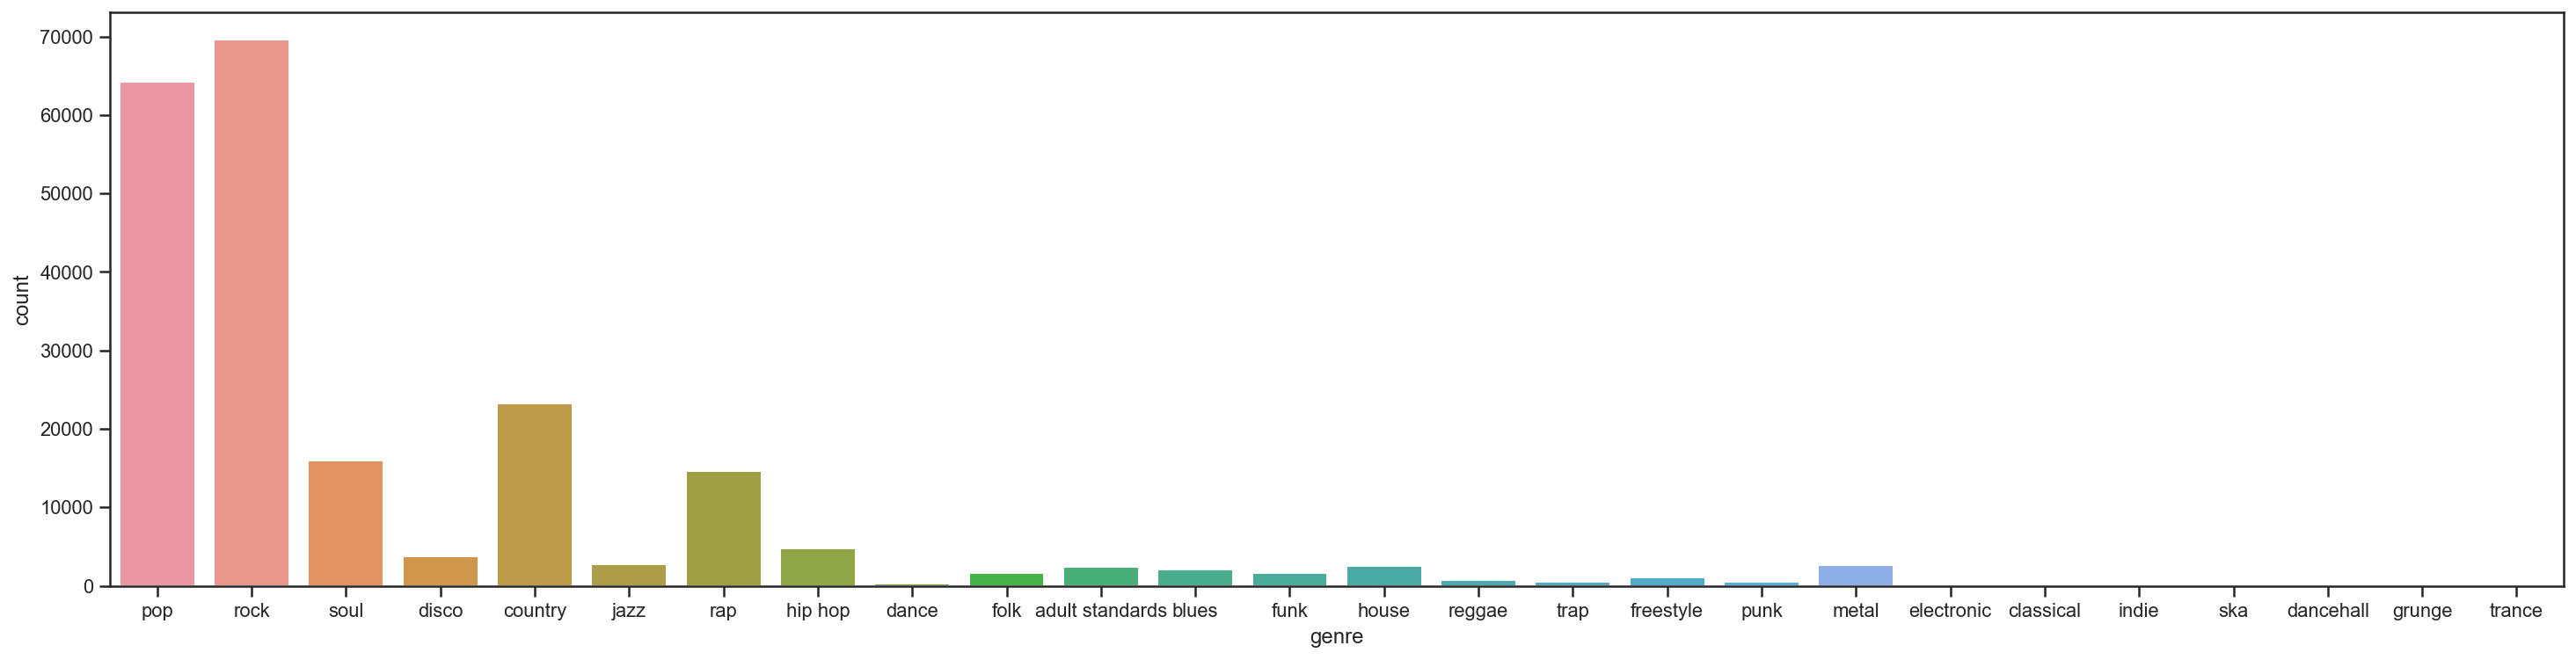

In [170]:
f, ax = plt.subplots(figsize=(25, 6))
sns.set_color_codes("muted")
sns.countplot(x='genre', data=df, orient="v");

In [518]:
for x in df_cvec_3.most_common.isnull()[df_cvec_3.most_common.isnull() == True].index:
    if everything.genre.iloc[x] != '[]':
        print(everything.iloc[x, :].genre)

['cowboy western', 'nashville sound']
['cowboy western', 'nashville sound']
['cowboy western', 'nashville sound']
['cowboy western', 'nashville sound']
['cowboy western', 'nashville sound']
['cowboy western', 'nashville sound']
['cowboy western', 'nashville sound']
['cowboy western', 'nashville sound']
['cowboy western', 'nashville sound']
['cowboy western', 'nashville sound']
['cowboy western', 'nashville sound']
['cowboy western', 'nashville sound']
['cowboy western', 'nashville sound']
['cowboy western', 'nashville sound']
['cowboy western', 'nashville sound']
['cowboy western', 'nashville sound']
['cowboy western', 'nashville sound']
['cowboy western', 'nashville sound']
['cowboy western', 'nashville sound']
['cowboy western', 'nashville sound']
['cowboy western', 'nashville sound']
['cowboy western', 'nashville sound']
['cowboy western', 'nashville sound']
['cowboy western', 'nashville sound']
['cowboy western', 'nashville sound']
['cowboy western', 'nashville sound']
['cowboy wes

['new jack swing']
['new jack swing']
['new jack swing']
['new jack swing']
['new jack swing']
['new jack swing']
['new jack swing']
['new jack swing']
['new jack swing']
['new jack swing']
['doo-wop']
['doo-wop']
['doo-wop']
['doo-wop']
['doo-wop']
['doo-wop']
['doo-wop']
['doo-wop']
['doo-wop']
['doo-wop']
['doo-wop']
['doo-wop']
['doo-wop']
['doo-wop']
['doo-wop']
['doo-wop']
['doo-wop']
['doo-wop']
['doo-wop']
['doo-wop']
['new romantic', 'synthpop']
['new romantic', 'synthpop']
['new romantic', 'synthpop']
['new romantic', 'synthpop']
['new romantic', 'synthpop']
['new romantic', 'synthpop']
['new romantic', 'synthpop']
['new romantic', 'synthpop']
['new romantic', 'synthpop']
['new romantic', 'synthpop']
['new romantic', 'synthpop']
['new romantic', 'synthpop']
['new romantic', 'synthpop']
['new romantic', 'synthpop']
['new romantic', 'synthpop']
['new romantic', 'synthpop']
['new romantic', 'synthpop']
['new romantic', 'synthpop']
['r&b', 'urban contemporary']
['r&b', 'urban con

['broadway', 'hollywood', 'show tunes']
['broadway', 'hollywood', 'show tunes']
['broadway', 'hollywood', 'show tunes']
['broadway', 'hollywood', 'show tunes']
['broadway', 'hollywood', 'show tunes']
['broadway', 'hollywood', 'show tunes']
['broadway', 'hollywood', 'show tunes']
['broadway', 'hollywood', 'show tunes']
['broadway', 'hollywood', 'show tunes']
['new jack swing', 'r&b', 'urban contemporary']
['new jack swing', 'r&b', 'urban contemporary']
['new jack swing', 'r&b', 'urban contemporary']
['new jack swing', 'r&b', 'urban contemporary']
['new jack swing', 'r&b', 'urban contemporary']
['new jack swing', 'r&b', 'urban contemporary']
['new jack swing', 'r&b', 'urban contemporary']
['new jack swing', 'r&b', 'urban contemporary']
['new jack swing', 'r&b', 'urban contemporary']
['new jack swing', 'r&b', 'urban contemporary']
['new jack swing', 'r&b', 'urban contemporary']
['new jack swing', 'r&b', 'urban contemporary']
['new jack swing', 'r&b', 'urban contemporary']
['new jack swing

['spanish invasion']
['spanish invasion']
['spanish invasion']
['spanish invasion']
['new jack swing', 'quiet storm', 'r&b', 'urban contemporary']
['new jack swing', 'quiet storm', 'r&b', 'urban contemporary']
['new jack swing', 'quiet storm', 'r&b', 'urban contemporary']
['new jack swing', 'quiet storm', 'r&b', 'urban contemporary']
['new jack swing', 'quiet storm', 'r&b', 'urban contemporary']
['new jack swing', 'quiet storm', 'r&b', 'urban contemporary']
['new jack swing', 'quiet storm', 'r&b', 'urban contemporary']
['new jack swing', 'quiet storm', 'r&b', 'urban contemporary']
['new jack swing', 'quiet storm', 'r&b', 'urban contemporary']
['new jack swing', 'quiet storm', 'r&b', 'urban contemporary']
['new jack swing', 'quiet storm', 'r&b', 'urban contemporary']
['new jack swing', 'quiet storm', 'r&b', 'urban contemporary']
['new jack swing', 'quiet storm', 'r&b', 'urban contemporary']
['new jack swing', 'quiet storm', 'r&b', 'urban contemporary']
['new jack swing', 'quiet storm', 

['new jack swing', 'urban contemporary']
['new jack swing', 'urban contemporary']
['new jack swing', 'urban contemporary']
['new jack swing', 'urban contemporary']
['new jack swing', 'urban contemporary']
['new jack swing', 'urban contemporary']
['new jack swing', 'urban contemporary']
['new jack swing', 'urban contemporary']
['new jack swing', 'urban contemporary']
['new jack swing', 'urban contemporary']
['new jack swing', 'urban contemporary']
['new jack swing', 'urban contemporary']
['new jack swing', 'urban contemporary']
['new jack swing', 'urban contemporary']
['new jack swing', 'urban contemporary']
['new jack swing', 'urban contemporary']
['new jack swing', 'urban contemporary']
['new jack swing', 'urban contemporary']
['new jack swing', 'urban contemporary']
['new jack swing', 'urban contemporary']
['new jack swing', 'urban contemporary']
['new jack swing', 'urban contemporary']
['new jack swing', 'urban contemporary']
['new jack swing', 'urban contemporary']
['new jack swing

['new jack swing', 'quiet storm', 'urban contemporary']
['new jack swing', 'quiet storm', 'urban contemporary']
['new jack swing', 'quiet storm', 'urban contemporary']
['new jack swing', 'quiet storm', 'urban contemporary']
['new jack swing', 'quiet storm', 'urban contemporary']
['new jack swing', 'quiet storm', 'urban contemporary']
['new jack swing', 'quiet storm', 'urban contemporary']
['new jack swing', 'quiet storm', 'urban contemporary']
['new jack swing', 'quiet storm', 'urban contemporary']
['new jack swing', 'quiet storm', 'urban contemporary']
['new jack swing', 'quiet storm', 'urban contemporary']
['new jack swing', 'quiet storm', 'urban contemporary']
['doo-wop']
['doo-wop']
['doo-wop']
['new jack smooth']
['new jack smooth']
['new jack smooth']
['new jack smooth']
['balkan brass']
['balkan brass']
['balkan brass']
['balkan brass']
['balkan brass']
['balkan brass']
['balkan brass']
['balkan brass']
['balkan brass']
['balkan brass']
['balkan brass']
['deep talent show']
['de

['new jack swing', 'r&b', 'urban contemporary']
['new jack swing', 'r&b', 'urban contemporary']
['new jack swing', 'r&b', 'urban contemporary']
['new jack swing', 'r&b', 'urban contemporary']
['new jack swing', 'r&b', 'urban contemporary']
['new jack swing', 'r&b', 'urban contemporary']
['new jack swing', 'r&b', 'urban contemporary']
['new jack swing', 'r&b', 'urban contemporary']
['new jack swing', 'r&b', 'urban contemporary']
['new jack swing', 'r&b', 'urban contemporary']
['new jack swing', 'r&b', 'urban contemporary']
['new jack swing', 'r&b', 'urban contemporary']
['new jack swing', 'r&b', 'urban contemporary']
['new jack swing']
['new jack swing']
['new jack swing']
['new jack swing']
['new jack swing']
['new jack swing']
['new jack swing']
['new jack swing']
['new jack swing']
['new jack swing']
['new jack swing']
['new jack swing']
['new jack swing']
['new jack swing']
['new jack swing']
['new jack swing']
['new jack swing']
['new jack swing']
['new jack swing']
['new jack swin

['brostep', 'complextro', 'edm', 'electro']
['brostep', 'complextro', 'edm', 'electro']
['deep new wave']
['deep new wave']
['deep new wave']
['deep new wave']
['deep new wave']
['deep new wave']
['deep new wave']
['deep new wave']
['deep new wave']
['deep new wave']
['deep new wave']
['deep new wave']
['deep new wave']
['deep new wave']
['ccm', 'cedm']
['ccm', 'cedm']
['ccm', 'cedm']
['ccm', 'cedm']
['ccm', 'cedm']
['ccm', 'cedm']
['ccm', 'cedm']
['ccm', 'cedm']
['ccm', 'cedm']
['ccm', 'cedm']
['ccm', 'cedm']
['ccm', 'cedm']
['ccm', 'cedm']
['ccm', 'cedm']
['ccm', 'cedm']
['ccm', 'cedm']
['ccm', 'cedm']
['ccm', 'cedm']
['ccm', 'cedm']
['ccm', 'cedm']
['ccm', 'cedm']
['ccm', 'cedm']
['ccm', 'cedm']
['miami bass']
['miami bass']
['miami bass']
['miami bass']
['miami bass']
['miami bass']
['miami bass']
['miami bass']
['miami bass']
['miami bass']
['miami bass']
['miami bass']
['miami bass']
['miami bass']
['miami bass']
['miami bass']
['miami bass']
['miami bass']
['miami bass']
['miami

['deep new wave', 'new romantic', 'new wave', 'synthpop']
['deep new wave', 'new romantic', 'new wave', 'synthpop']
['deep new wave', 'new romantic', 'new wave', 'synthpop']
['deep new wave', 'new romantic', 'new wave', 'synthpop']
['quiet storm', 'urban contemporary']
['quiet storm', 'urban contemporary']
['quiet storm', 'urban contemporary']
['quiet storm', 'urban contemporary']
['quiet storm', 'urban contemporary']
['quiet storm', 'urban contemporary']
['quiet storm', 'urban contemporary']
['idol']
['idol']
['idol']
['idol']
['idol']
['idol']
['idol']
['idol']
['idol']
['idol']
['idol']
['idol']
['idol']
['idol']
['idol']
['idol']
['idol']
['idol']
['idol']
['idol']
['latin', 'reggaeton', 'reggaeton flow', 'tropical']
['latin', 'reggaeton', 'reggaeton flow', 'tropical']
['latin', 'reggaeton', 'reggaeton flow', 'tropical']
['latin', 'reggaeton', 'reggaeton flow', 'tropical']
['latin', 'reggaeton', 'reggaeton flow', 'tropical']
['latin', 'reggaeton', 'reggaeton flow', 'tropical']
['la

['cowboy western']
['cowboy western']
['cowboy western']
['cowboy western']
['cowboy western']
['cowboy western']
['cowboy western']
['cowboy western']
['cowboy western']
['cowboy western']
['cowboy western']
['cowboy western']
['cowboy western']
['cowboy western']
['cowboy western']
['deep talent show']
['deep talent show']
['deep talent show']
['europop']
['europop']
['europop']
['europop']
['europop']
['europop']
['europop']
['europop']
['europop']
['europop']
['europop']
['europop']
['europop']
['europop']
['europop']
['europop']
['europop']
['europop']
['europop']
['europop']
['europop']
['europop']
['europop']
['europop']
['europop']
['deep talent show']
['novelty']
['novelty']
['novelty']
['dixieland']
['dixieland']
['dixieland']
['dixieland']
['dixieland']
['dixieland']
['dixieland']
['dixieland']
['dixieland']
['dixieland']
['dixieland']
['dixieland']
['dixieland']
['dixieland']
['dixieland']
['dixieland']
['dixieland']
['dixieland']
['dixieland']
['dixieland']
['dixieland']
[

['surf music']
['surf music']
['surf music']
['surf music']
['moog']
['moog']
['moog']
['moog']
['moog']
['moog']
['moog']
['moog']
['moog']
['moog']
['moog']
['moog']
['moog']
['moog']
['moog']
['moog']
['moog']
['moog']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['boy band']
['celtic', 'middle earth']
['celtic', 'middle earth']
['celtic', 'middle earth']
['celtic', 'middle earth']
['celtic', 'middle earth']
['celtic', 'middle earth']
['cel

['ccm', 'christian music', 'worship']
['ccm', 'christian music', 'worship']
['ccm', 'christian music', 'worship']
['ccm', 'christian music', 'worship']
['ccm', 'christian music', 'worship']
['ccm', 'christian music', 'worship']
['ccm', 'christian music', 'worship']
['ccm', 'christian music', 'worship']
['ccm', 'christian music', 'worship']
['ccm', 'christian music', 'worship']
['ccm', 'christian music', 'worship']
['ccm', 'christian music', 'worship']
['ccm', 'christian music', 'worship']
['ccm', 'christian music', 'worship']
['ccm', 'christian music', 'worship']
['ccm', 'christian music', 'worship']
['ccm', 'christian music', 'worship']
['surf music']
['surf music']
['surf music']
['surf music']
['surf music']
['surf music']
['surf music']
['surf music']
['clean comedy', 'comedy', 'comic']
['clean comedy', 'comedy', 'comic']
['clean comedy', 'comedy', 'comic']
['clean comedy', 'comedy', 'comic']
['clean comedy', 'comedy', 'comic']
['clean comedy', 'comedy', 'comic']
['clean comedy', '

['irish singer-songwriter']
['synthpop']
['synthpop']
['synthpop']
['synthpop']
['synthpop']
['synthpop']
['synthpop']
['rare groove']
['rare groove']
['rare groove']
['rare groove']
['rare groove']
['rare groove']
['progressive psytrance']
['progressive psytrance']
['progressive psytrance']
['progressive psytrance']
['progressive psytrance']
['progressive psytrance']
['progressive psytrance']
['progressive psytrance']
['progressive psytrance']
['progressive psytrance']


## join

In [519]:
everything = everything.join(df_cvec_3.most_common)

In [ ]:
everything.drop_duplicates(keep='first', inplace=True)

#### save tracks to csv

In [893]:
everything.to_csv('everything_scraped_genre_1st_try', encoding='utf-8', index=False)

# -----------------------------------------------------------------------------------------